# Hotness Plotting

In [9]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Files to Load
hot_metro_data = pd.read_csv("data/RDC_MarketHotness_Monthly_Metro.csv")
regionid_data = pd.read_csv("data/CountyCrossWalk_Zillow.csv", encoding='ISO-8859-1')
top50_data = pd.read_csv("data/Affordability_Wide_2018Q3_Public.csv")

# Combine the data into a single dataset
data_metro = pd.DataFrame(hot_metro_data)
data_region = pd.DataFrame(regionid_data)
top_df = pd.DataFrame(top50_data)

# Need county or zip datasets?  

# Files to load
# hot_county_data = pd.read_csv("data/RDC_MarketHotness_Monthly_County.csv")
# hot_zip_data = pd.read_csv("data/RDC_MarketHotness_Monthly_Zip.csv")

# Create DataFrames
# data_county = pd.DataFrame(hot_county_data)
# data_zip = pd.DataFrame(hot_zip_data)

# Display the data table for preview
top_df.head(10)
data_metro.head(10)
data_region.head(10)
data_region.count()

Month                            1044
CBSACode                         1044
CBSATitle                        1044
Nielsen HH Rank                  1044
Hotness Rank                     1043
Hotness Rank M/M                 1043
Hotness Rank Y/Y                 1043
Hotness Score                    1043
Supply Score                     1043
Demand Score                     1043
Median DOM                       1044
Median DOM M/M                   1044
Median DOM M/M Perc              1044
Median DOM Y/Y                   1044
Median DOM Y/Y Perc              1044
Median DOM (vs US)               1043
Views Per Property M/M           1044
Views Per Property Y/Y           1044
Views Per Property  (vs US)      1043
Median Listing Price             1044
Median Listing Price M/M         1044
Median Listing Price Y/Y         1044
Median Listing Price  (vs US)    1043
Quality Flag                     1044
CountyName                       1043
StateName                        1043
StateFIPS   

,CountyName,StateName,StateFIPS,CountyFIPS,MetroName_Zillow,CBSAName,CountyRegionID_Zillow,RegionID,FIPS,CBSACode
0,Hudson,New Jersey,34,17,"New York, NY","New York-Newark-Jersey City, NY-NJ-PA",1106,394913.0,34017,35620.0
1,Morris,New Jersey,34,27,"New York, NY","New York-Newark-Jersey City, NY-NJ-PA",1241,394913.0,34027,35620.0
2,Nassau,New York,36,59,"New York, NY","New York-Newark-Jersey City, NY-NJ-PA",1252,394913.0,36059,35620.0
3,Orange,New York,36,71,"New York, NY","New York-Newark-Jersey City, NY-NJ-PA",1290,394913.0,36071,35620.0
4,Putnam,New York,36,79,"New York, NY","New York-Newark-Jersey City, NY-NJ-PA",1343,394913.0,36079,35620.0


In [52]:
# Set up look-up list for cross-matching Zillow and Realtor.com data
reduced_df = top_df.loc[:, ["RegionID", "RegionName", "SizeRank"]]
reduced_df.head()

# Data cleaning
reduced_df.sort_values(by=['RegionID'])
dedup_list = reduced_df.drop_duplicates(subset='RegionID')
dedup_list.count()
dedup_list.head(10)

# Rename columns
data_region.head()
reg_rename = data_region.rename(index=str, 
                                columns={"MetroRegionID_Zillow": "RegionID" 
                                         }
                               )
reg_rename.head()

# Merge datasets
list_reg_df = pd.merge(dedup_list, reg_rename, on="RegionID", how="left")
list_reg_df.head(10)

# Data cleaning
dedupe_list = list_reg_df.drop_duplicates(subset='RegionID')
dedupe_list.count()
sorted_df = dedupe_list.sort_values(by=['SizeRank'])
sorted_df.head(15)
reduced_df = sorted_df.loc[(sorted_df["SizeRank"] < 51)]
reduced_df.head()
sort_df = reduced_df.sort_values(by=['RegionName'])
sort_df.head(15)
sort_df.columns

lkup_lst = sort_df.loc[:, ["RegionID", "RegionName", "SizeRank", "CBSAName", "CBSACode"]]
lkup_lst.head(10)

,RegionID,RegionName,SizeRank,CBSAName,CBSACode
102,394347,"Atlanta, GA",9,"Atlanta-Sandy Springs-Roswell, GA",12060.0
307,394355,"Austin, TX",35,"Austin-Round Rock, TX",12420.0
192,394358,"Baltimore, MD",20,"Baltimore-Columbia-Towson, MD",12580.0
418,394388,"Birmingham, AL",49,"Birmingham-Hoover, AL",13820.0
131,394404,"Boston, MA",10,"Boston-Cambridge-Newton, MA-NH",14460.0
413,394425,"Buffalo, NY",47,"Buffalo-Cheektowaga-Niagara Falls, NY",15380.0
223,394458,"Charlotte, NC",24,"Charlotte-Concord-Gastonia, NC-SC",16740.0
28,394463,"Chicago, IL",3,"Chicago-Naperville-Elgin, IL-IN-WI",16980.0
249,394466,"Cincinnati, OH",28,"Cincinnati, OH-KY-IN",17140.0
264,394475,"Cleveland, OH",29,"Cleveland-Elyria, OH",17460.0


In [53]:
# Data cleaning

# Data types and count
# data_metro.head(10)
# data_metro.count()
# data_metro.dtypes

# Remove n/a
# data_clean = data.dropna(how='any')
# data_clean.count()
# data_clean.dtypes

# Rename columns
data_rename = data_clean.rename(index=str, 
                                columns={"Hotness Rank ": "hrank", 
                                         "Hotness Score": "hscore",
                                         "Median Listing Price": "MedListPrice"}
                               )
# data_rename.columns
# data_rename.head()
data_sort = data_rename.sort_values(by=['hrank'])
data_sort.head()

,Month,CBSACode,CBSATitle,Nielsen HH Rank,hrank,Hotness Rank M/M,Hotness Rank Y/Y,hscore,Supply Score,Demand Score,...,Median DOM Y/Y Perc,Median DOM (vs US),Views Per Property M/M,Views Per Property Y/Y,Views Per Property (vs US),MedListPrice,Median Listing Price M/M,Median Listing Price Y/Y,Median Listing Price (vs US),Quality Flag
220,201812,17020,"Chico, CA",196,1.0,15.0,28.0,100.000000,100.000000,100.000000,...,-0.4559,-43.0,0.1939,0.7640,2.5738,330000.0,0.0909,0.1466,1.1419,0
285,201812,33260,"Midland, TX",260,2.0,-1.0,18.0,98.494983,97.658863,99.331104,...,-0.2000,-28.0,0.0480,0.2241,2.3279,350790.0,-0.0214,0.1288,1.2138,0
280,201812,36220,"Odessa, TX",292,3.0,1.0,41.0,94.816054,95.317726,94.314381,...,-0.1791,-25.0,0.0505,0.4444,1.7049,270000.0,0.0133,0.3171,0.9343,0
95,201812,18140,"Columbus, OH",31,4.0,-1.0,5.0,94.481605,91.638796,97.324415,...,-0.0167,-21.0,0.0000,-0.0569,1.9016,229900.0,-0.0402,0.0455,0.7955,0
252,201812,23060,"Fort Wayne, IN",119,5.0,-3.0,7.0,94.314381,88.963211,99.665552,...,0.0000,-19.0,0.0068,0.3704,2.4262,179900.0,0.0000,0.1105,0.6225,0


In [60]:
# Data cleaning
df_sort = data_rename.sort_values(by=['CBSACode'])
df_sort.head(15)

lkup_lst.sort_values(by=['CBSACode'])
lkup_lst.head(15)

# Merge datasets
top_df = pd.merge(lkup_lst, df_sort, on="CBSACode", how="left")
top_df.head(10)
top_df.count()

RegionID                         51
RegionName                       51
SizeRank                         51
CBSAName                         50
CBSACode                         50
Month                            50
CBSATitle                        50
Nielsen HH Rank                  50
hrank                            50
Hotness Rank M/M                 50
Hotness Rank Y/Y                 50
hscore                           50
Supply Score                     50
Demand Score                     50
Median DOM                       50
Median DOM M/M                   50
Median DOM M/M Perc              50
Median DOM Y/Y                   50
Median DOM Y/Y Perc              50
Median DOM (vs US)               50
Views Per Property M/M           50
Views Per Property Y/Y           50
Views Per Property  (vs US)      50
MedListPrice                     50
Median Listing Price M/M         50
Median Listing Price Y/Y         50
Median Listing Price  (vs US)    50
Quality Flag                

In [77]:
data_sort = top_df.sort_values(by=['hrank'])
data_sort.head(10)

,RegionID,RegionName,SizeRank,CBSAName,CBSACode,Month,CBSATitle,Nielsen HH Rank,hrank,Hotness Rank M/M,...,Median DOM Y/Y Perc,Median DOM (vs US),Views Per Property M/M,Views Per Property Y/Y,Views Per Property (vs US),MedListPrice,Median Listing Price M/M,Median Listing Price Y/Y,Median Listing Price (vs US),Quality Flag
10,394492,"Columbus, OH",32,"Columbus, OH",18140.0,201812.0,"Columbus, OH",31.0,4.0,-1.0,...,-0.0167,-21.0,0.0000,-0.0569,1.9016,229900.0,-0.0402,0.0455,0.7955,0.0
43,395057,"San Francisco, CA",11,"San Francisco-Oakland-Hayward, CA",41860.0,201812.0,"San Francisco-Oakland-Hayward, CA",11.0,6.0,2.0,...,0.1333,-29.0,0.1034,-0.2381,1.5738,855000.0,-0.0431,-0.0372,2.9585,0.0
39,395045,"Sacramento, CA",25,"Sacramento--Roseville--Arden-Arcade, CA",40900.0,201812.0,"Sacramento--Roseville--Arden-Arcade, CA",29.0,7.0,0.0,...,0.0172,-21.0,0.0863,0.0094,1.7541,449000.0,0.0090,0.0228,1.5536,0.0
4,394404,"Boston, MA",10,"Boston-Cambridge-Newton, MA-NH",14460.0,201812.0,"Boston-Cambridge-Newton, MA-NH",10.0,9.0,-4.0,...,0.0156,-15.0,0.0268,0.2523,2.1967,499900.0,-0.0014,0.0204,1.7298,0.0
13,394532,"Detroit, MI",12,"Detroit-Warren-Dearborn, MI",19820.0,201812.0,"Detroit-Warren-Dearborn, MI",12.0,13.0,-4.0,...,-0.0328,-21.0,-0.0265,-0.0213,1.5082,220000.0,-0.0276,0.0633,0.7612,0.0
11,394514,"Dallas-Fort Worth, TX",4,"Dallas-Fort Worth-Arlington, TX",19100.0,201812.0,"Dallas-Fort Worth-Arlington, TX",4.0,15.0,14.0,...,0.1017,-15.0,0.0256,-0.0196,1.6393,332590.0,-0.0070,-0.0215,1.1508,0.0
26,394902,"Nashville, TN",37,"Nashville-Davidson--Murfreesboro--Franklin, TN",34980.0,201812.0,"Nashville-Davidson--Murfreesboro--Franklin, TN",35.0,16.0,8.0,...,0.1304,-28.0,0.0241,0.1972,1.3934,349900.0,0.0000,-0.0213,1.2107,0.0
21,394807,"Louisville-Jefferson County, KY",43,"Louisville/Jefferson County, KY-IN",31140.0,201812.0,"Louisville/Jefferson County, KY-IN",42.0,18.0,-1.0,...,-0.0809,-17.5,-0.0052,0.3194,1.5574,240000.0,-0.0301,0.0946,0.8304,0.0
24,394862,"Milwaukee, WI",39,"Milwaukee-Waukesha-West Allis, WI",33340.0,201812.0,"Milwaukee-Waukesha-West Allis, WI",38.0,22.0,4.0,...,-0.1528,-19.0,0.0395,0.2267,1.5082,244900.0,-0.0165,0.1396,0.8474,0.0
47,395148,"Tampa, FL",19,"Tampa-St. Petersburg-Clearwater, FL",45300.0,201812.0,"Tampa-St. Petersburg-Clearwater, FL",17.0,28.0,10.0,...,-0.0159,-18.0,-0.0492,0.1013,1.4262,259900.0,-0.0054,-0.0004,0.8993,0.0


In [61]:
data_revsort = top_df.sort_values(by=['hrank'], ascending=False)
data_revsort.head()

,RegionID,RegionName,SizeRank,CBSAName,CBSACode,Month,CBSATitle,Nielsen HH Rank,hrank,Hotness Rank M/M,...,Median DOM Y/Y Perc,Median DOM (vs US),Views Per Property M/M,Views Per Property Y/Y,Views Per Property (vs US),MedListPrice,Median Listing Price M/M,Median Listing Price Y/Y,Median Listing Price (vs US),Quality Flag
23,394856,"Miami-Fort Lauderdale, FL",8,"Miami-Fort Lauderdale-West Palm Beach, FL",33100.0,201812.0,"Miami-Fort Lauderdale-West Palm Beach, FL",8.0,248.0,6.0,...,-0.0430,9.0,-0.0465,0.1389,0.6721,384900.0,-0.0003,-0.0003,1.3318,0.0
49,395194,"Virginia Beach, VA",36,"Virginia Beach-Norfolk-Newport News, VA-NC",47260.0,201812.0,"Virginia Beach-Norfolk-Newport News, VA-NC",37.0,219.0,-4.0,...,-0.0506,-5.0,0.0000,0.2917,0.5082,279000.0,0.0000,0.0372,0.9654,0.0
28,394913,"New York, NY",1,"New York-Newark-Jersey City, NY-NJ-PA",35620.0,201812.0,"New York-Newark-Jersey City, NY-NJ-PA",1.0,203.0,-5.0,...,-0.0345,4.0,-0.0192,0.0625,0.8361,524900.0,-0.0078,0.1051,1.8163,0.0
15,394692,"Houston, TX",6,"Houston-The Woodlands-Sugar Land, TX",26420.0,201812.0,"Houston-The Woodlands-Sugar Land, TX",5.0,200.0,11.0,...,0.0000,-9.0,0.0526,0.2500,0.4918,307590.0,-0.0078,-0.0204,1.0643,0.0
3,394388,"Birmingham, AL",49,"Birmingham-Hoover, AL",13820.0,201812.0,"Birmingham-Hoover, AL",49.0,168.0,-8.0,...,-0.1224,6.0,-0.0496,0.5581,1.0984,219900.0,0.0000,0.1078,0.7609,0.0


In [63]:
# NC Cities
not_null_df = top_df.dropna(how="any")
nc_df = not_null_df.loc[not_null_df['CBSATitle'].str.contains(', NC')]
nc_sort = nc_df.sort_values(by=['hrank'])
nc_sort

,RegionID,RegionName,SizeRank,CBSAName,CBSACode,Month,CBSATitle,Nielsen HH Rank,hrank,Hotness Rank M/M,...,Median DOM Y/Y Perc,Median DOM (vs US),Views Per Property M/M,Views Per Property Y/Y,Views Per Property (vs US),MedListPrice,Median Listing Price M/M,Median Listing Price Y/Y,Median Listing Price (vs US),Quality Flag
6,394458,"Charlotte, NC",24,"Charlotte-Concord-Gastonia, NC-SC",16740.0,201812.0,"Charlotte-Concord-Gastonia, NC-SC",24.0,32.0,13.0,...,-0.0800,-11.0,0.0104,0.2125,1.5902,323268.0,-0.0068,-0.0053,1.1186,0.0
36,395012,"Raleigh, NC",48,"Raleigh, NC",39580.0,201812.0,"Raleigh, NC",46.0,97.0,0.0,...,0.0685,-2.0,-0.0119,0.1370,1.3607,339900.0,0.0000,0.0140,1.1761,0.0


In [80]:
# Highest Median Listing Price
not_null_df.describe()
listing_high = not_null_df.loc[(not_null_df["MedListPrice"] < (not_null_df["MedListPrice"].median()))]
listing_high

,RegionID,RegionName,SizeRank,CBSAName,CBSACode,Month,CBSATitle,Nielsen HH Rank,hrank,Hotness Rank M/M,...,Median DOM Y/Y Perc,Median DOM (vs US),Views Per Property M/M,Views Per Property Y/Y,Views Per Property (vs US),MedListPrice,Median Listing Price M/M,Median Listing Price Y/Y,Median Listing Price (vs US),Quality Flag
2,394358,"Baltimore, MD",20,"Baltimore-Columbia-Towson, MD",12580.0,201812.0,"Baltimore-Columbia-Towson, MD",21.0,161.0,-10.0,...,0.0000,-8.0,-0.0275,0.1277,0.8689,298000.0,-0.0230,0.0456,1.0311,0.0
3,394388,"Birmingham, AL",49,"Birmingham-Hoover, AL",13820.0,201812.0,"Birmingham-Hoover, AL",49.0,168.0,-8.0,...,-0.1224,6.0,-0.0496,0.5581,1.0984,219900.0,0.0000,0.1078,0.7609,0.0
5,394425,"Buffalo, NY",47,"Buffalo-Cheektowaga-Niagara Falls, NY",15380.0,201812.0,"Buffalo-Cheektowaga-Niagara Falls, NY",47.0,31.0,1.0,...,-0.0147,-13.0,-0.0355,0.1585,1.5574,174900.0,-0.0278,0.0600,0.6052,0.0
7,394463,"Chicago, IL",3,"Chicago-Naperville-Elgin, IL-IN-WI",16980.0,201812.0,"Chicago-Naperville-Elgin, IL-IN-WI",3.0,139.0,-10.0,...,-0.0417,-11.0,-0.0179,0.0784,0.9016,279000.0,-0.0209,0.0337,0.9654,0.0
8,394466,"Cincinnati, OH",28,"Cincinnati, OH-KY-IN",17140.0,201812.0,"Cincinnati, OH-KY-IN",28.0,40.0,6.0,...,-0.0870,-17.0,-0.0061,0.2857,1.3279,233500.0,-0.0253,0.0860,0.8080,0.0
9,394475,"Cleveland, OH",29,"Cleveland-Elyria, OH",17460.0,201812.0,"Cleveland-Elyria, OH",26.0,45.0,-3.0,...,-0.0759,-7.0,-0.0291,0.3514,1.6393,170000.0,-0.0286,0.0658,0.5882,0.0
10,394492,"Columbus, OH",32,"Columbus, OH",18140.0,201812.0,"Columbus, OH",31.0,4.0,-1.0,...,-0.0167,-21.0,0.0000,-0.0569,1.9016,229900.0,-0.0402,0.0455,0.7955,0.0
13,394532,"Detroit, MI",12,"Detroit-Warren-Dearborn, MI",19820.0,201812.0,"Detroit-Warren-Dearborn, MI",12.0,13.0,-4.0,...,-0.0328,-21.0,-0.0265,-0.0213,1.5082,220000.0,-0.0276,0.0633,0.7612,0.0
14,394669,"Hartford, CT",44,"Hartford-West Hartford-East Hartford, CT",25540.0,201812.0,"Hartford-West Hartford-East Hartford, CT",48.0,115.0,-3.0,...,0.0488,6.0,0.0056,0.2192,1.4590,259900.0,-0.0266,0.0000,0.8993,0.0
16,394705,"Indianapolis, IN",33,"Indianapolis-Carmel-Anderson, IN",26900.0,201812.0,"Indianapolis-Carmel-Anderson, IN",32.0,81.0,-28.0,...,0.0141,-8.0,-0.0241,0.2273,1.3279,235000.0,-0.0124,0.1196,0.8131,0.0


In [81]:
# Hotness Rating (100)
not_null_df.describe()
hrank_high = not_null_df.loc[(not_null_df["hrank"] <= 100)]
sort_hrank = hrank_high.sort_values(by=['hrank'])
sort_hrank

,RegionID,RegionName,SizeRank,CBSAName,CBSACode,Month,CBSATitle,Nielsen HH Rank,hrank,Hotness Rank M/M,...,Median DOM Y/Y Perc,Median DOM (vs US),Views Per Property M/M,Views Per Property Y/Y,Views Per Property (vs US),MedListPrice,Median Listing Price M/M,Median Listing Price Y/Y,Median Listing Price (vs US),Quality Flag
10,394492,"Columbus, OH",32,"Columbus, OH",18140.0,201812.0,"Columbus, OH",31.0,4.0,-1.0,...,-0.0167,-21.0,0.0000,-0.0569,1.9016,229900.0,-0.0402,0.0455,0.7955,0.0
43,395057,"San Francisco, CA",11,"San Francisco-Oakland-Hayward, CA",41860.0,201812.0,"San Francisco-Oakland-Hayward, CA",11.0,6.0,2.0,...,0.1333,-29.0,0.1034,-0.2381,1.5738,855000.0,-0.0431,-0.0372,2.9585,0.0
39,395045,"Sacramento, CA",25,"Sacramento--Roseville--Arden-Arcade, CA",40900.0,201812.0,"Sacramento--Roseville--Arden-Arcade, CA",29.0,7.0,0.0,...,0.0172,-21.0,0.0863,0.0094,1.7541,449000.0,0.0090,0.0228,1.5536,0.0
4,394404,"Boston, MA",10,"Boston-Cambridge-Newton, MA-NH",14460.0,201812.0,"Boston-Cambridge-Newton, MA-NH",10.0,9.0,-4.0,...,0.0156,-15.0,0.0268,0.2523,2.1967,499900.0,-0.0014,0.0204,1.7298,0.0
13,394532,"Detroit, MI",12,"Detroit-Warren-Dearborn, MI",19820.0,201812.0,"Detroit-Warren-Dearborn, MI",12.0,13.0,-4.0,...,-0.0328,-21.0,-0.0265,-0.0213,1.5082,220000.0,-0.0276,0.0633,0.7612,0.0
11,394514,"Dallas-Fort Worth, TX",4,"Dallas-Fort Worth-Arlington, TX",19100.0,201812.0,"Dallas-Fort Worth-Arlington, TX",4.0,15.0,14.0,...,0.1017,-15.0,0.0256,-0.0196,1.6393,332590.0,-0.0070,-0.0215,1.1508,0.0
26,394902,"Nashville, TN",37,"Nashville-Davidson--Murfreesboro--Franklin, TN",34980.0,201812.0,"Nashville-Davidson--Murfreesboro--Franklin, TN",35.0,16.0,8.0,...,0.1304,-28.0,0.0241,0.1972,1.3934,349900.0,0.0000,-0.0213,1.2107,0.0
21,394807,"Louisville-Jefferson County, KY",43,"Louisville/Jefferson County, KY-IN",31140.0,201812.0,"Louisville/Jefferson County, KY-IN",42.0,18.0,-1.0,...,-0.0809,-17.5,-0.0052,0.3194,1.5574,240000.0,-0.0301,0.0946,0.8304,0.0
24,394862,"Milwaukee, WI",39,"Milwaukee-Waukesha-West Allis, WI",33340.0,201812.0,"Milwaukee-Waukesha-West Allis, WI",38.0,22.0,4.0,...,-0.1528,-19.0,0.0395,0.2267,1.5082,244900.0,-0.0165,0.1396,0.8474,0.0
47,395148,"Tampa, FL",19,"Tampa-St. Petersburg-Clearwater, FL",45300.0,201812.0,"Tampa-St. Petersburg-Clearwater, FL",17.0,28.0,10.0,...,-0.0159,-18.0,-0.0492,0.1013,1.4262,259900.0,-0.0054,-0.0004,0.8993,0.0


<function matplotlib.pyplot.show(*args, **kw)>

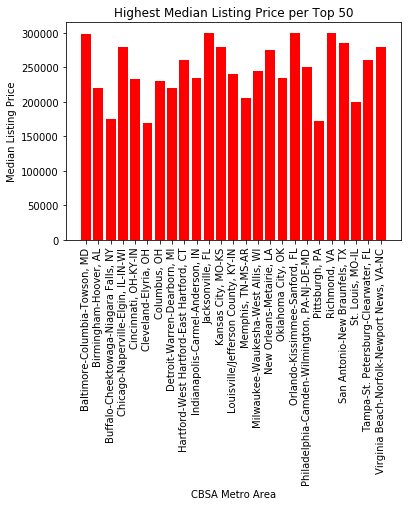

In [75]:
# Obtain the x and y coordinates
x_axis = listing_high['CBSATitle']
y_axis = listing_high['MedListPrice']
tick_locations = [value for value in x_axis]

plt.bar(x_axis, y_axis, color="r", align="center")
plt.xticks(tick_locations, listing_high['CBSATitle'], rotation='vertical')

# Set a Title and labels
plt.title("Highest Median Listing Price per Top 50")
plt.xlabel("CBSA Metro Area")
plt.ylabel("Median Listing Price")

plt.show

Text(0, 0.5, 'Median Listing Price')

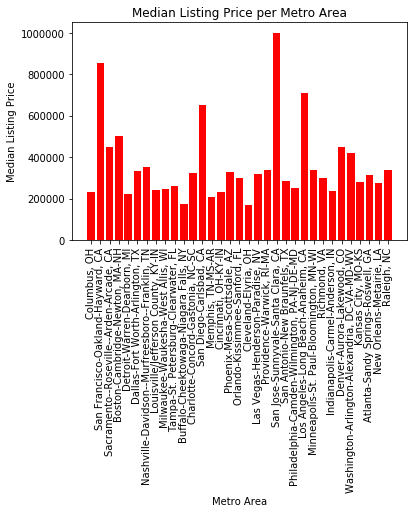

In [83]:
# Obtain the x and y coordinates for NC
x_axis = sort_hrank['CBSATitle']
y_axis = sort_hrank['MedListPrice']
tick_locations = [value for value in x_axis]

plt.bar(x_axis, y_axis, color="r", align="center")
plt.xticks(tick_locations, sort_hrank['CBSATitle'], rotation="vertical")

# Set a Title and labels
plt.title("Median Listing Price per Metro Area")
plt.xlabel("Metro Area")
plt.ylabel("Median Listing Price")